In [ ]:
import nltk
import string
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer 
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /home/admyyh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/admyyh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/admyyh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# 1. Sample text for demonstration
sample_text = """Natural Language Processing (NLP) is a field of artificial intelligence in 21 th century that focuses on the interaction 
between computers and humans using natural language. The ultimate objective of NLP is to read, decipher, understand, 
and make sense of human languages in a valuable way. NLP is used in many applications including machine translation, 
speech recognition, sentiment analysis, question answering, and text summarization. Despite recent advances, NLP 
remains a challenging field due to the ambiguity and complexity of human language."""

In [74]:
# 2. Sentence Tokenization
sentences = sent_tokenize(sample_text)
print(f"Sentence Tokenization (Total: {len(sentences)} sentences):")
for i, sentence in enumerate(sentences, 1):
    print(f"Sentence {i}: {sentence}")


Sentence Tokenization (Total: 4 sentences):
Sentence 1: Natural Language Processing (NLP) is a field of artificial intelligence in 21 th century that focuses on the interaction 
between computers and humans using natural language.
Sentence 2: The ultimate objective of NLP is to read, decipher, understand, 
and make sense of human languages in a valuable way.
Sentence 3: NLP is used in many applications including machine translation, 
speech recognition, sentiment analysis, question answering, and text summarization.
Sentence 4: Despite recent advances, NLP 
remains a challenging field due to the ambiguity and complexity of human language.


In [75]:
# 3. Word Tokenization
words = word_tokenize(sample_text)
print(f"Word Tokenization (Total: {len(words)} tokens):")
print(sample_text, "...")  # Display first 20 tokens for brevity
print("---" * 30)  # Display first 20 tokens for brevity

print(words[:20], "...")  # Display first 20 tokens for brevity


Word Tokenization (Total: 95 tokens):
Natural Language Processing (NLP) is a field of artificial intelligence in 21 th century that focuses on the interaction 
between computers and humans using natural language. The ultimate objective of NLP is to read, decipher, understand, 
and make sense of human languages in a valuable way. NLP is used in many applications including machine translation, 
speech recognition, sentiment analysis, question answering, and text summarization. Despite recent advances, NLP 
remains a challenging field due to the ambiguity and complexity of human language. ...
------------------------------------------------------------------------------------------
['Natural', 'Language', 'Processing', '(', 'NLP', ')', 'is', 'a', 'field', 'of', 'artificial', 'intelligence', 'in', '21', 'th', 'century', 'that', 'focuses', 'on', 'the'] ...


In [76]:
# 4. Lowercase Conversion
words_lower = [word.lower() for word in words]
print("Lowercase Conversion:")
print(words_lower[:20], "...")


Lowercase Conversion:
['natural', 'language', 'processing', '(', 'nlp', ')', 'is', 'a', 'field', 'of', 'artificial', 'intelligence', 'in', '21', 'th', 'century', 'that', 'focuses', 'on', 'the'] ...


In [77]:
# 5. Removing Punctuation
words_no_punct = [word for word in words_lower if word not in string.punctuation]
print("After Removing Punctuation:")
print(words_no_punct[:20], "...")


After Removing Punctuation:
['natural', 'language', 'processing', 'nlp', 'is', 'a', 'field', 'of', 'artificial', 'intelligence', 'in', '21', 'th', 'century', 'that', 'focuses', 'on', 'the', 'interaction', 'between'] ...


In [78]:
# 6. Removing Numbers
words_no_numbers = [word for word in words_no_punct if not word.isdigit()]
print("After Removing Numbers:")
print(words_no_numbers[:20], "...")


After Removing Numbers:
['natural', 'language', 'processing', 'nlp', 'is', 'a', 'field', 'of', 'artificial', 'intelligence', 'in', 'th', 'century', 'that', 'focuses', 'on', 'the', 'interaction', 'between', 'computers'] ...


In [79]:
# 7. Removing Stop Words
stop_words = set(stopwords.words('english'))
words_no_stopwords = [word for word in words_no_numbers if word not in stop_words]
print(f"After Removing Stop Words (Reduced from {len(words_no_numbers)} to {len(words_no_stopwords)} tokens):")
print(words_no_stopwords[:20], "...")


After Removing Stop Words (Reduced from 80 to 55 tokens):
['natural', 'language', 'processing', 'nlp', 'field', 'artificial', 'intelligence', 'th', 'century', 'focuses', 'interaction', 'computers', 'humans', 'using', 'natural', 'language', 'ultimate', 'objective', 'nlp', 'read'] ...


In [80]:
# 8. Stemming
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in words_no_stopwords]
print("After Stemming:")
print(stemmed_words[:20], "...")


After Stemming:
['natur', 'languag', 'process', 'nlp', 'field', 'artifici', 'intellig', 'th', 'centuri', 'focus', 'interact', 'comput', 'human', 'use', 'natur', 'languag', 'ultim', 'object', 'nlp', 'read'] ...


In [81]:
# 9. Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in words_no_stopwords]
print("After Lemmatization:")
print(lemmatized_words[:20], "...")


After Lemmatization:
['natural', 'language', 'processing', 'nlp', 'field', 'artificial', 'intelligence', 'th', 'century', 'focus', 'interaction', 'computer', 'human', 'using', 'natural', 'language', 'ultimate', 'objective', 'nlp', 'read'] ...


In [88]:
# 10. Comparison of Stemming vs Lemmatization
comparison = pd.DataFrame({
    'Original': words_no_stopwords[:15],
    'Stemmed': stemmed_words[:15],
    'Lemmatized': lemmatized_words[:15]
})
comparison

,Original,Stemmed,Lemmatized
0,natural,natur,natural
1,language,languag,language
2,processing,process,processing
3,nlp,nlp,nlp
4,field,field,field
5,artificial,artifici,artificial
6,intelligence,intellig,intelligence
7,th,th,th
8,century,centuri,century
9,focuses,focus,focus


In [83]:
# 11. Creating Vocabulary
vocabulary = sorted(set(lemmatized_words))
print(f"Vocabulary Size: {len(vocabulary)}")
print("Vocabulary (first 20 terms):")
print(vocabulary[:20])


Vocabulary Size: 45
Vocabulary (first 20 terms):
['advance', 'ambiguity', 'analysis', 'answering', 'application', 'artificial', 'century', 'challenging', 'complexity', 'computer', 'decipher', 'despite', 'due', 'field', 'focus', 'human', 'including', 'intelligence', 'interaction', 'language']


In [ ]:
Counter(lemmatized_words)

In [ ]:
# 12. Term Frequency
word_freq = Counter(lemmatized_words)
most_common = word_freq.most_common(10)
print("Top 10 Most Frequent Terms:")
for word, freq in most_common:
    print(f"{word}: {freq}")


In [97]:
vocab = {}
for word, freq in word_freq.items():
    if freq >= 2:
        vocab[word] = freq
vocab

{'natural': 2, 'language': 4, 'nlp': 4, 'field': 2, 'human': 3}

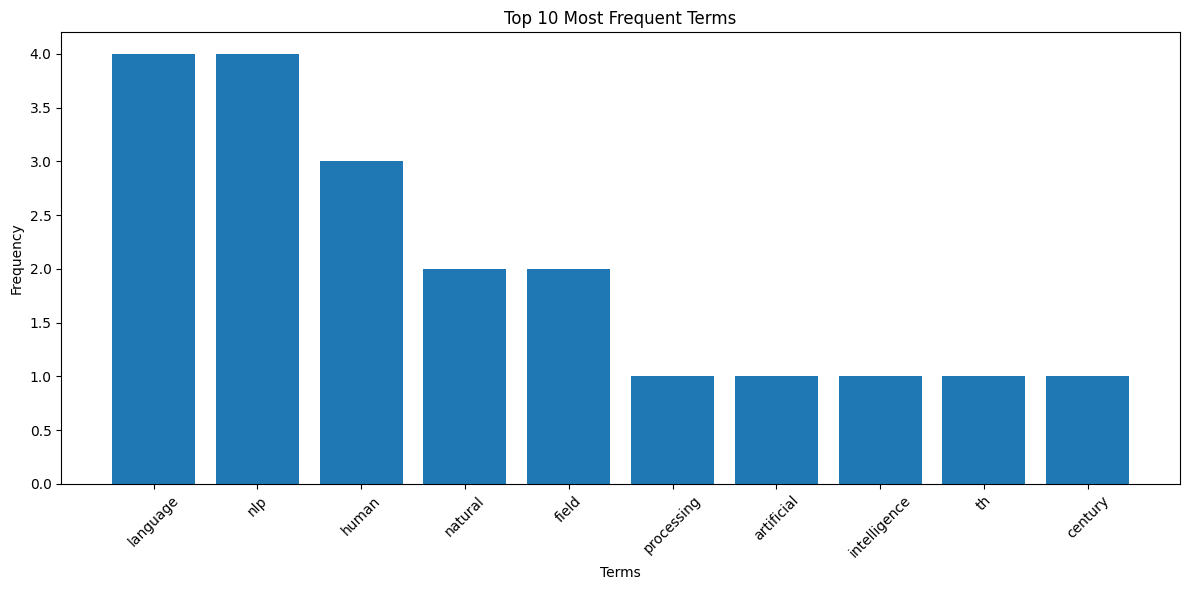

In [85]:
# Visualize word frequencies
plt.figure(figsize=(12, 6))
words, freqs = zip(*most_common)
plt.bar(words, freqs)
plt.title('Top 10 Most Frequent Terms')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# 13. Full Preprocessing Function
def preprocess_text(text):
    """
    Function to preprocess text with all the steps shown above
    """
    # Tokenize
    tokens = word_tokenize(text.lower())
    
    # Remove punctuation and numbers
    tokens = [token for token in tokens if token not in string.punctuation]
    
    # Remove stopwords
    # stop_words = set(stopwords.words('english'))
    # tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens

# Example usage of the full preprocessing function
processed_text = preprocess_text(sample_text)
print("\nFinal Processed Text:")
print(processed_text)




Final Processed Text:
['natural', 'language', 'processing', 'nlp', 'field', 'artificial', 'intelligence', 'th', 'century', 'focus', 'interaction', 'computer', 'human', 'using', 'natural', 'language', 'ultimate', 'objective', 'nlp', 'read', 'decipher', 'understand', 'make', 'sense', 'human', 'language', 'valuable', 'way', 'nlp', 'used', 'many', 'application', 'including', 'machine', 'translation', 'speech', 'recognition', 'sentiment', 'analysis', 'question', 'answering', 'text', 'summarization', 'despite', 'recent', 'advance', 'nlp', 'remains', 'challenging', 'field', 'due', 'ambiguity', 'complexity', 'human', 'language']


In [87]:



# 14. Building and Saving a Vocabulary
def build_vocabulary(texts, min_freq=1):
    """
    Build vocabulary from a list of preprocessed texts.
    - texts: List of tokenized texts
    - min_freq: Minimum frequency for a term to be included
    """
    # Flatten list of tokens
    all_tokens = [token for text in texts for token in text]
    
    # Count tokens
    token_counts = Counter(all_tokens)
    
    # Filter by minimum frequency
    vocabulary = {token: count for token, count in token_counts.items() if count >= min_freq}
    
    # Assign indices to tokens
    token_to_idx = {token: idx for idx, token in enumerate(sorted(vocabulary.keys()))}
    
    return token_to_idx, vocabulary

# Example with multiple texts
texts = [
    "Natural language processing is fascinating.",
    "Machine learning models can process text efficiently.",
    "NLTK provides tools for text preprocessing."
]

# Preprocess all texts
processed_texts = [preprocess_text(text) for text in texts]

# Build vocabulary
token_to_idx, vocab = build_vocabulary(processed_texts, min_freq=1)

print("Vocabulary with Indices:")
for token, idx in token_to_idx.items():
    print(f"{token}: {idx}")

print(f"\nVocabulary Size: {len(vocab)}")
print("\nWord Frequencies:")
for token, count in sorted(vocab.items(), key=lambda x: x[1], reverse=True):
    print(f"{token}: {count}")

Vocabulary with Indices:
efficiently: 0
fascinating: 1
language: 2
learning: 3
machine: 4
model: 5
natural: 6
nltk: 7
preprocessing: 8
process: 9
processing: 10
provides: 11
text: 12
tool: 13

Vocabulary Size: 14

Word Frequencies:
text: 2
natural: 1
language: 1
processing: 1
fascinating: 1
machine: 1
learning: 1
model: 1
process: 1
efficiently: 1
nltk: 1
provides: 1
tool: 1
preprocessing: 1
